Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('data/Bank_Customer_Churn.csv', sep = ',')

In [5]:
df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [8]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited      Complain  Satisfaction Score  \
count     10000.000000  10000.000000  10000.000000        10000.000000   
mean     100090.239881      0.203800      0.204400            3.013800   
std       57510.492818      0.402842      0.403283            1.405919   
min          11.580000      0.000000      0.000000            1.000000   
25%       51002.110000      0.000000      0.000000            2.000000   
50%      100193.915000      0.000000      0.000000            3.000000   
75%      149388.247500      0.000000      0.000000            4.000000   
max      199992.480000      1.000000      1.000000            5.000000   

       Point Earned  
count  10000.000000  
mean     606.515100  
std      225.924839  
min      119.000000  
25%      410.000000  
50%      605.000000  
75%      801.000000  
max     1000.000000

In [9]:
df.dtypes
# removing geography, customerId, surname, RowNumber

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [11]:
df['CustomerId'].nunique()
# no duplicate customer ids in the 10k rows

10000

In [12]:
# removing geography, customerId, surname, RowNumber

columns_to_keep = ['CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned']

# Create a new DataFrame with the specified columns
df1 = df[columns_to_keep].copy()

# Display the new DataFrame
df1.head(2)

CreditScore  Gender  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619  Female   42       2      0.00              1          1   
1          608  Female   41       1  83807.86              1          0   

   IsActiveMember  EstimatedSalary  Exited  Complain  Satisfaction Score  \
0               1        101348.88       1         1                   2   
1               1        112542.58       0         1                   3   

  Card Type  Point Earned  
0   DIAMOND           464  
1   DIAMOND           456

In [13]:
df1 = df1.rename(columns={'EstimatedSalary': 'Salary', 'Tenure': 'YearsWithBank'})

In [14]:
df1['JoinAge'] = df1['Age'] - df1['YearsWithBank']

In [15]:
df1.head(2)

CreditScore  Gender  Age  YearsWithBank   Balance  NumOfProducts  \
0          619  Female   42              2      0.00              1   
1          608  Female   41              1  83807.86              1   

   HasCrCard  IsActiveMember     Salary  Exited  Complain  Satisfaction Score  \
0          1               1  101348.88       1         1                   2   
1          0               1  112542.58       0         1                   3   

  Card Type  Point Earned  JoinAge  
0   DIAMOND           464       40  
1   DIAMOND           456       40

In [16]:
df1.dtypes

CreditScore             int64
Gender                 object
Age                     int64
YearsWithBank           int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
Salary                float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
JoinAge                 int64
dtype: object

In [17]:
# Exploratory Data Analysis

C:\Users\Admin\AppData\Local\Temp\ipykernel_3084\3688917451.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr().round(2)


<Axes: >

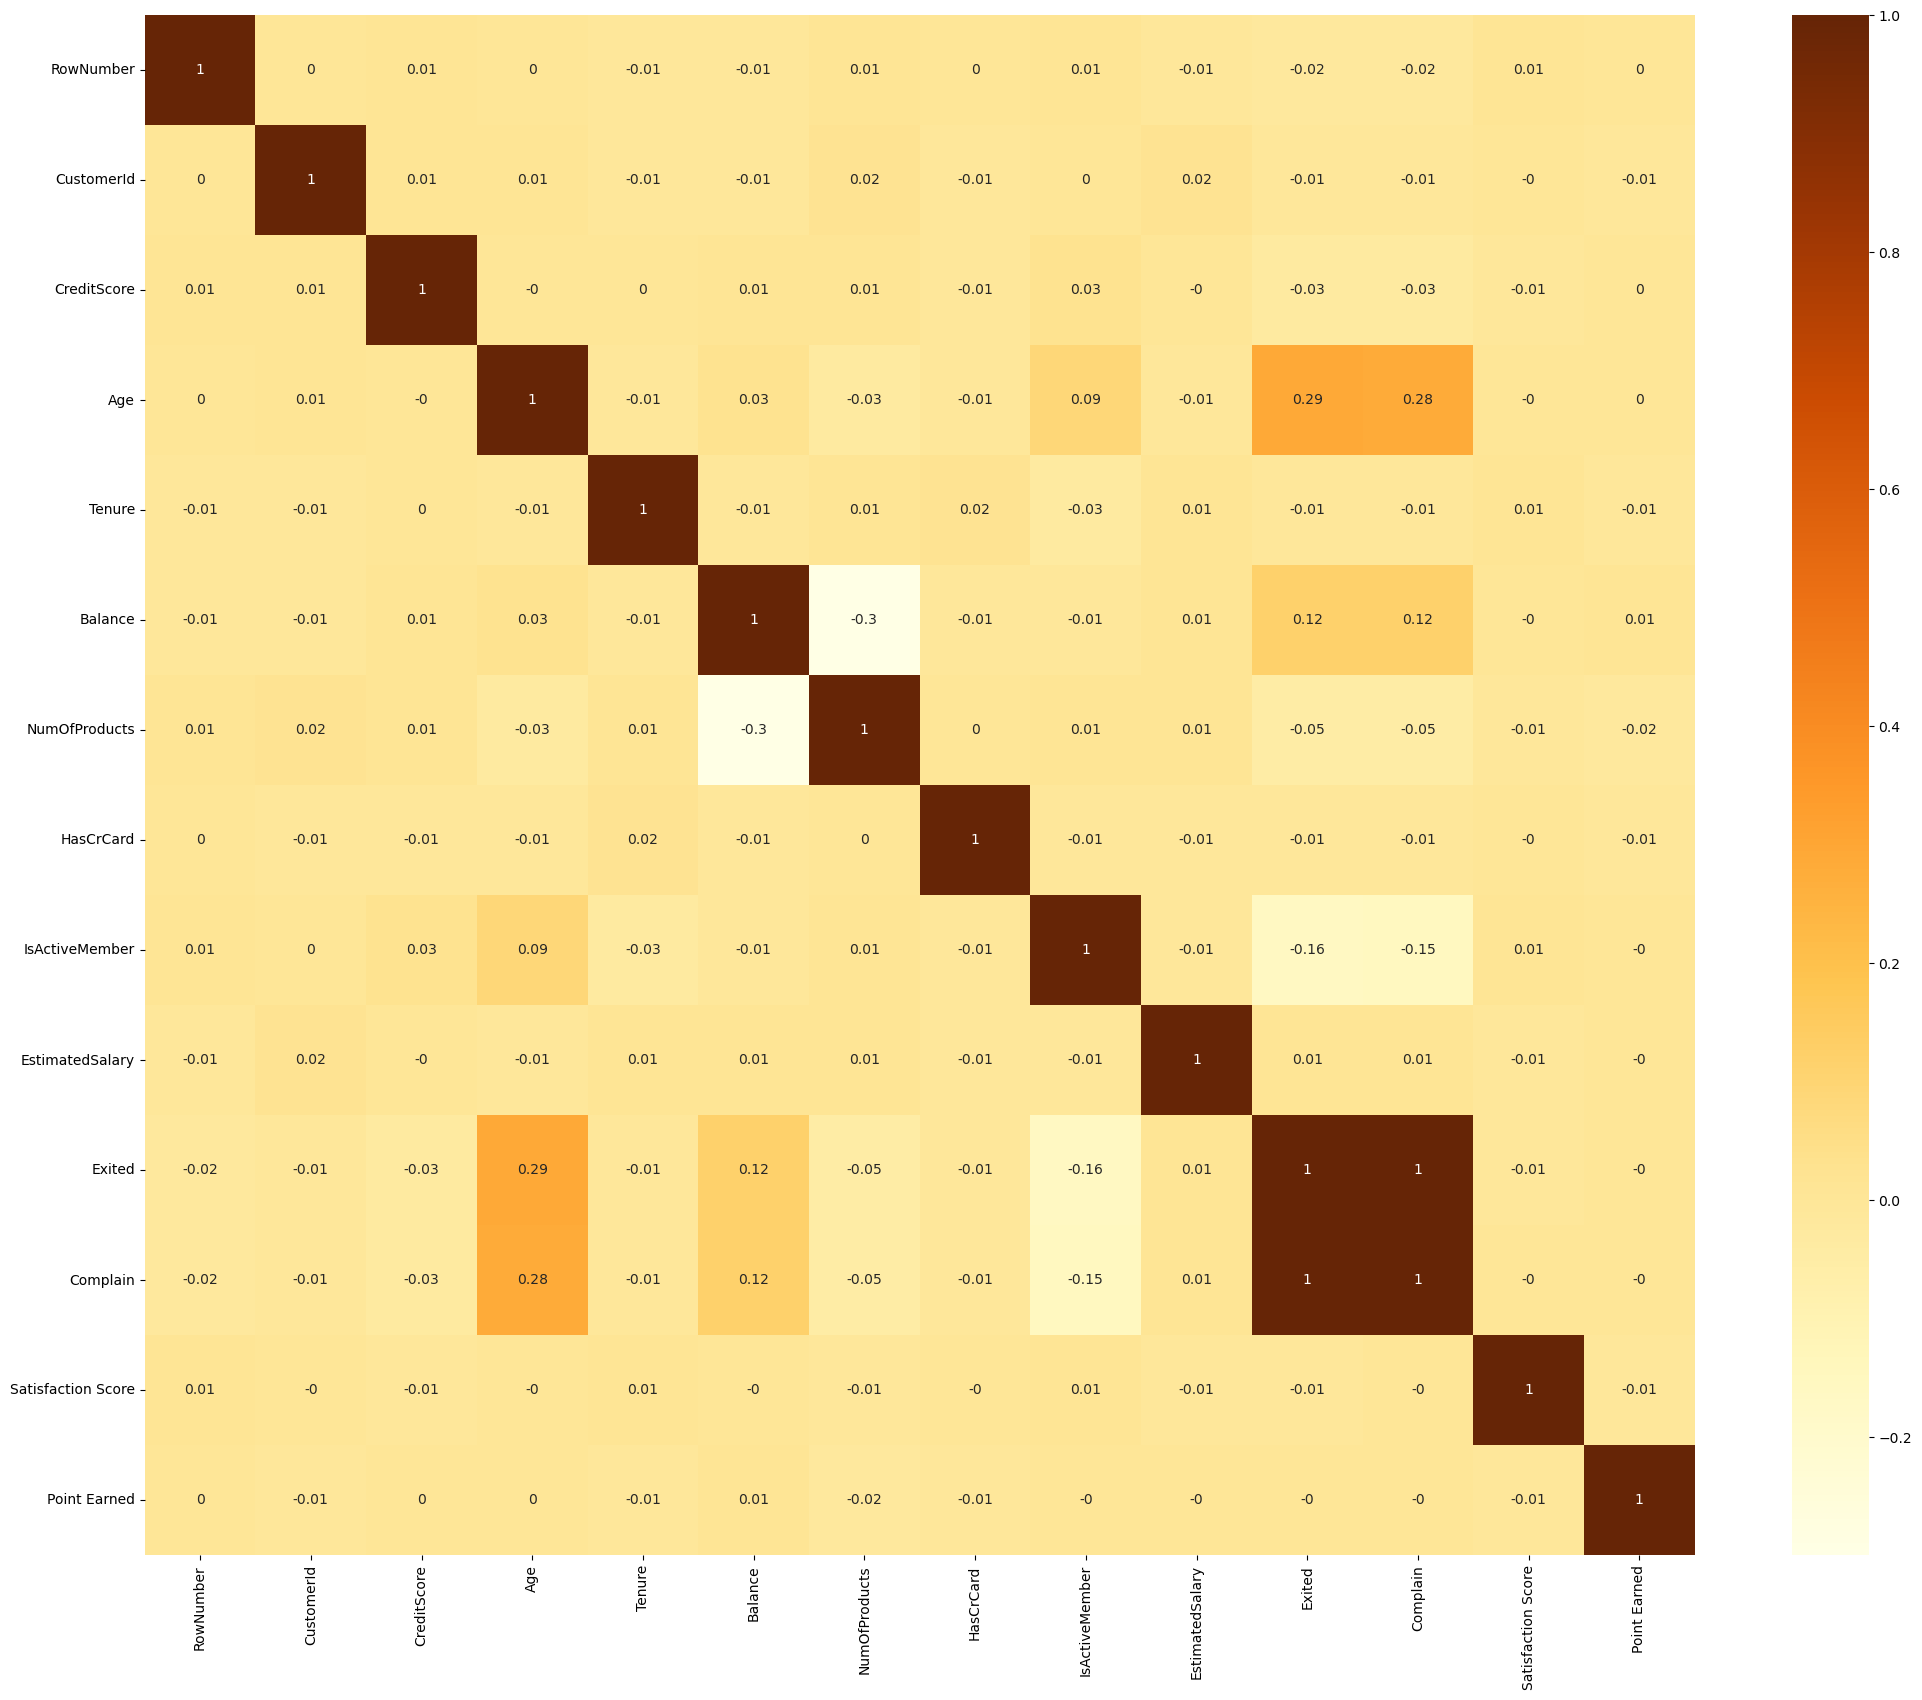

In [18]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

In [19]:
# Complaint is 100% correlated with the Target Variable Exit. 
# We don't know when it is logged (before or after exiting) and to prevent overfitting so we will remove it
df1 = df1.drop('Complain', axis = 1)

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

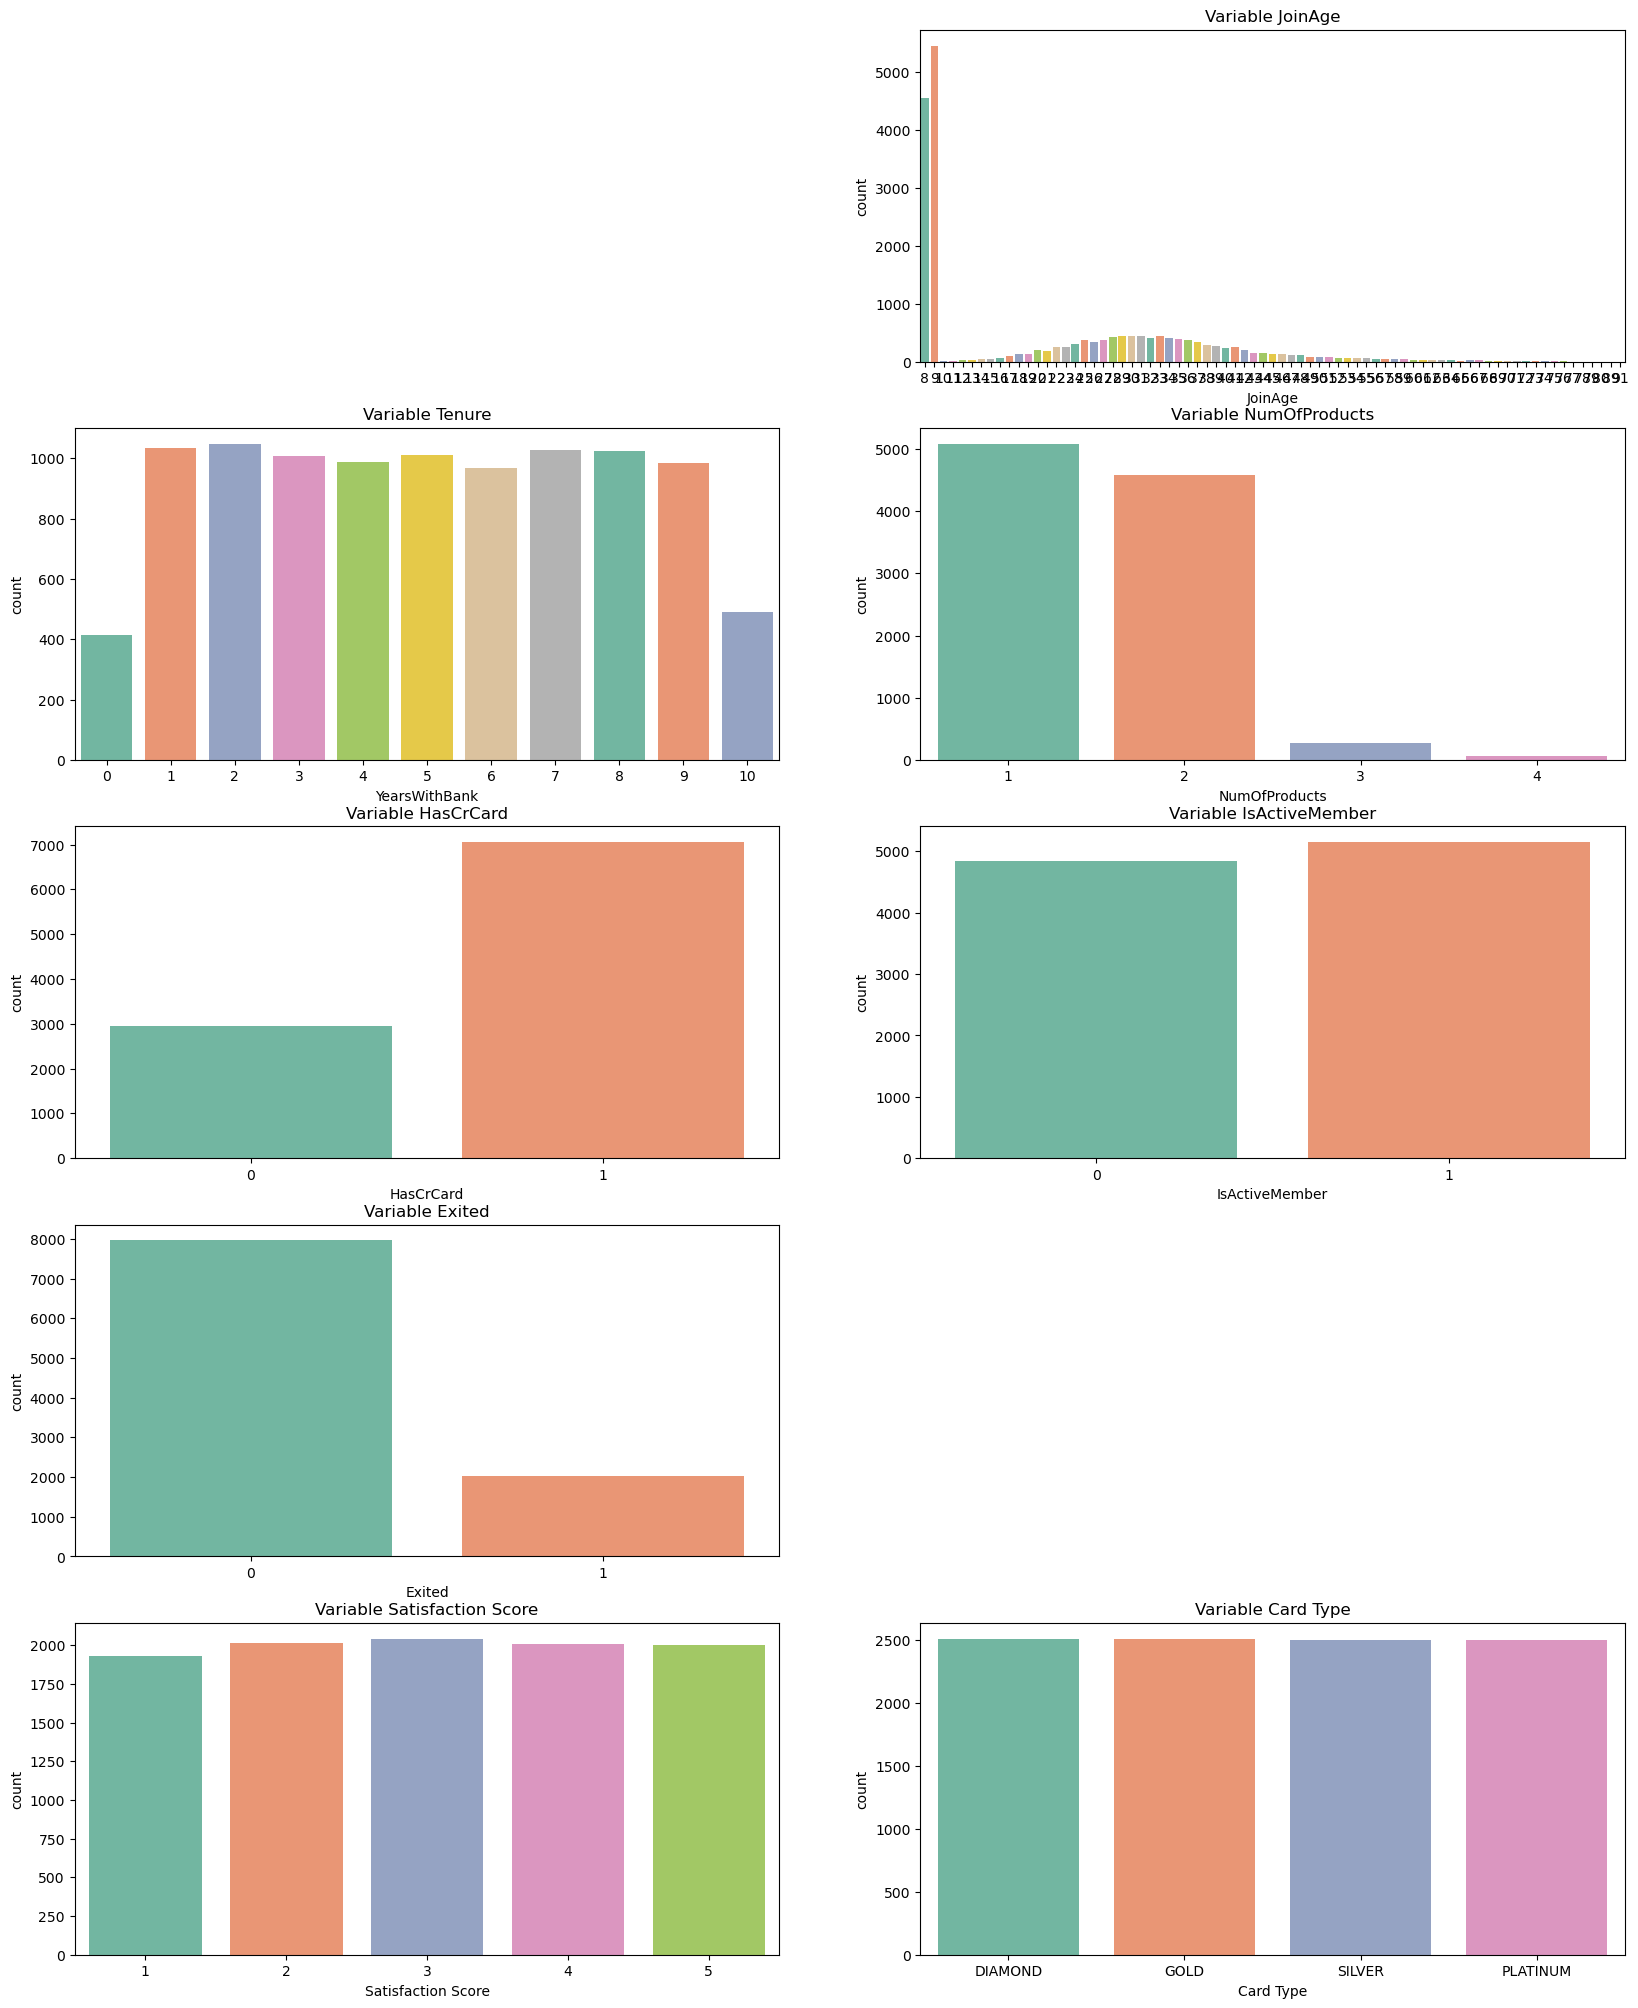

In [20]:
plt.figure(figsize = (20, 25))

# plt.subplot(5, 2, 1)
# plt.gca().set_title('Variable Geography')
# sns.countplot(x = 'Geography', palette = 'Set2', data = df1)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', palette = 'Set2', data = df1)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable JoinAge')
sns.countplot(x = 'JoinAge', palette = 'Set2', data = df1)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Tenure')
sns.countplot(x = 'YearsWithBank', palette = 'Set2', data = df1)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', palette = 'Set2', data = df1)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', palette = 'Set2', data = df1)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', palette = 'Set2', data = df1)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Exited')
sns.countplot(x = 'Exited', palette = 'Set2', data = df1)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', palette = 'Set2', data = df1)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', palette = 'Set2', data = df1)

In [21]:
# df1.hist(bins=45, figsize=(20,20));
# # plt.show()

<Axes: xlabel='Point Earned', ylabel='Count'>

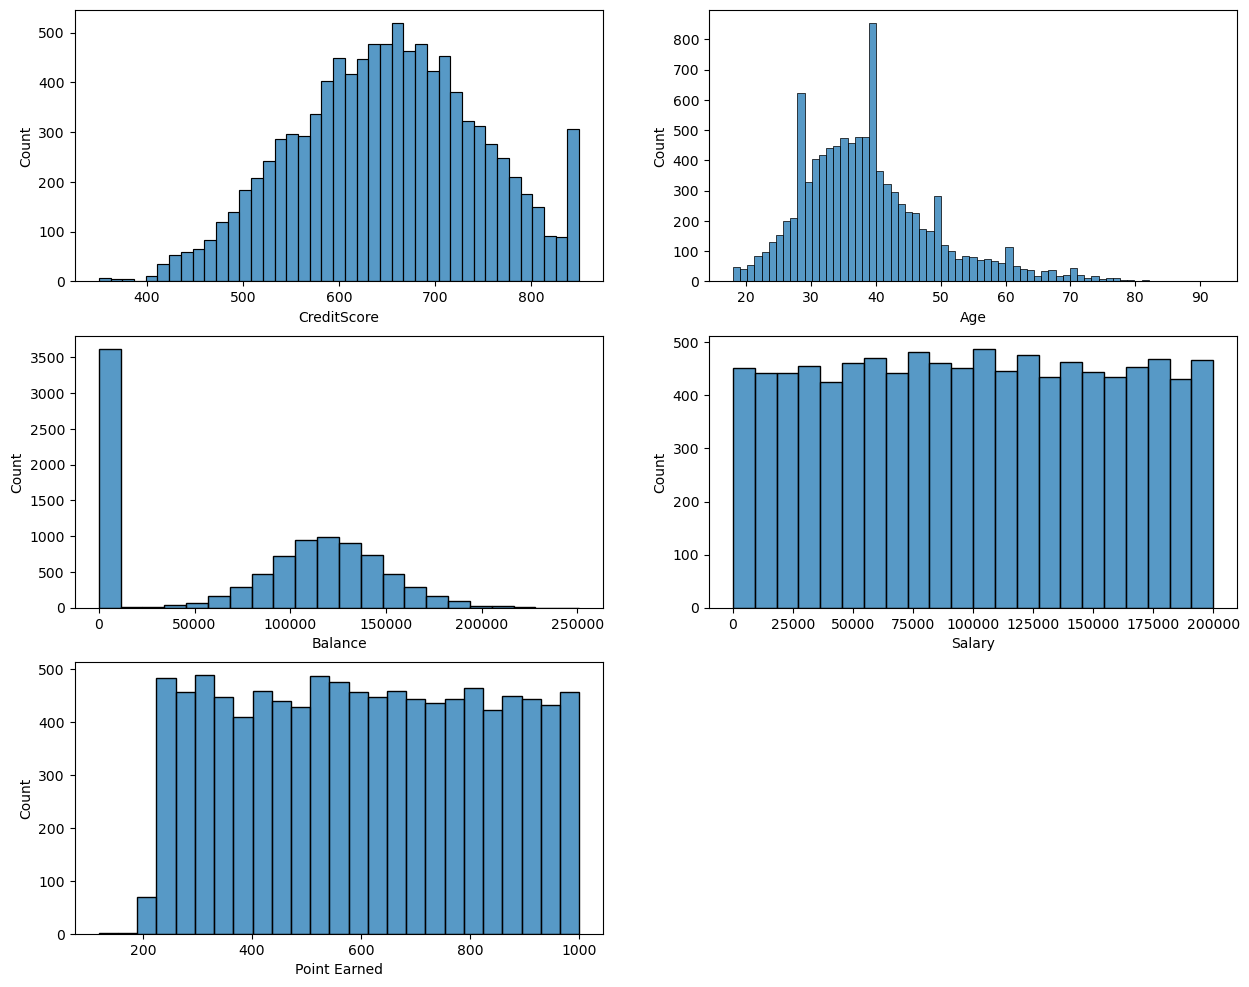

In [22]:
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
sns.histplot(x = df1['CreditScore'], kde = False)

plt.subplot(3, 2, 2)
sns.histplot(x = df1['Age'], kde = False)

plt.subplot(3, 2, 3)
sns.histplot(x = df1['Balance'], kde = False)

plt.subplot(3, 2, 4)
sns.histplot(x = df1['Salary'], kde = False)

plt.subplot(3, 2, 5)
sns.histplot(x = df1['Point Earned'], kde = False)

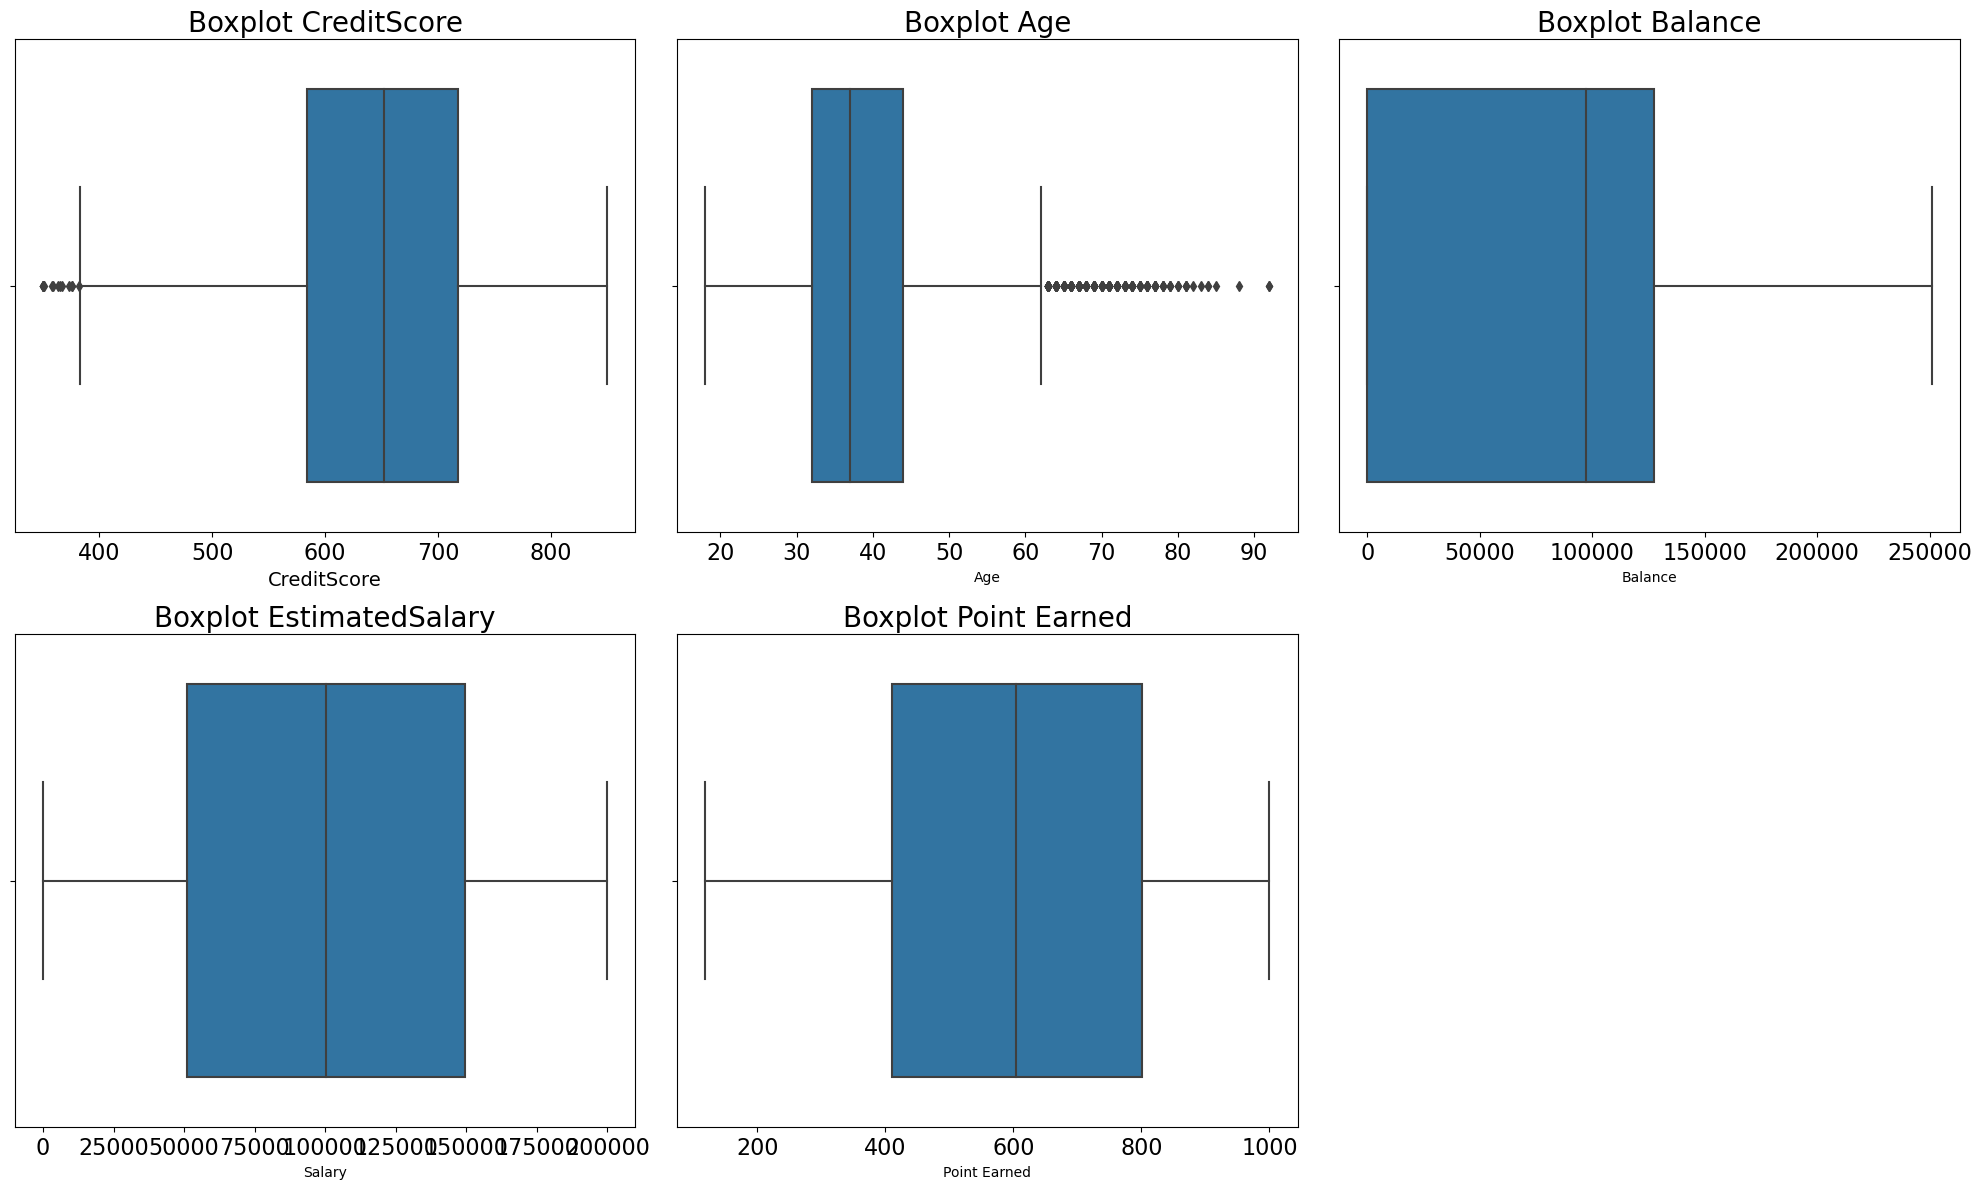

In [23]:
# Create a figure and set its size
plt.figure(figsize=(20, 12))

# Create the first subplot for the CreditScore boxplot
plt.subplot(2, 3, 1)  # 2 rows, 3 columns, subplot 1
plt.title("Boxplot CreditScore", fontdict={'fontsize': 20})
sns.boxplot(x=df1["CreditScore"])
plt.xlabel("CreditScore", fontsize=14)  # Increase font size of x-axis label
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels


# Create the second subplot for the Age boxplot
plt.subplot(2, 3, 2)  # 2 rows, 3 columns, subplot 2
plt.title("Boxplot Age", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Age"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the third subplot for the Balance boxplot
plt.subplot(2, 3, 3)  # 2 rows, 3 columns, subplot 3
plt.title("Boxplot Balance", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Balance"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the fourth subplot for the EstimatedSalary boxplot
plt.subplot(2, 3, 4)  # 2 rows, 3 columns, subplot 4
plt.title("Boxplot EstimatedSalary", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Salary"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Create the fifth subplot for the Point Earned boxplot
plt.subplot(2, 3, 5)  # 2 rows, 3 columns, subplot 5
plt.title("Boxplot Point Earned", fontdict={'fontsize': 20})
sns.boxplot(x=df1["Point Earned"])
plt.tick_params(axis='x', labelsize=16)  # Increase font size of x-axis tick labels

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Display the plot
plt.show()

# Bivaraite Analysis with Exit: Analysis of Categorical Variables

In [24]:
# No noticeable behaviours between categorical variables with the target variable, exit.

<Axes: title={'center': 'Variable Card Type'}, xlabel='Card Type', ylabel='count'>

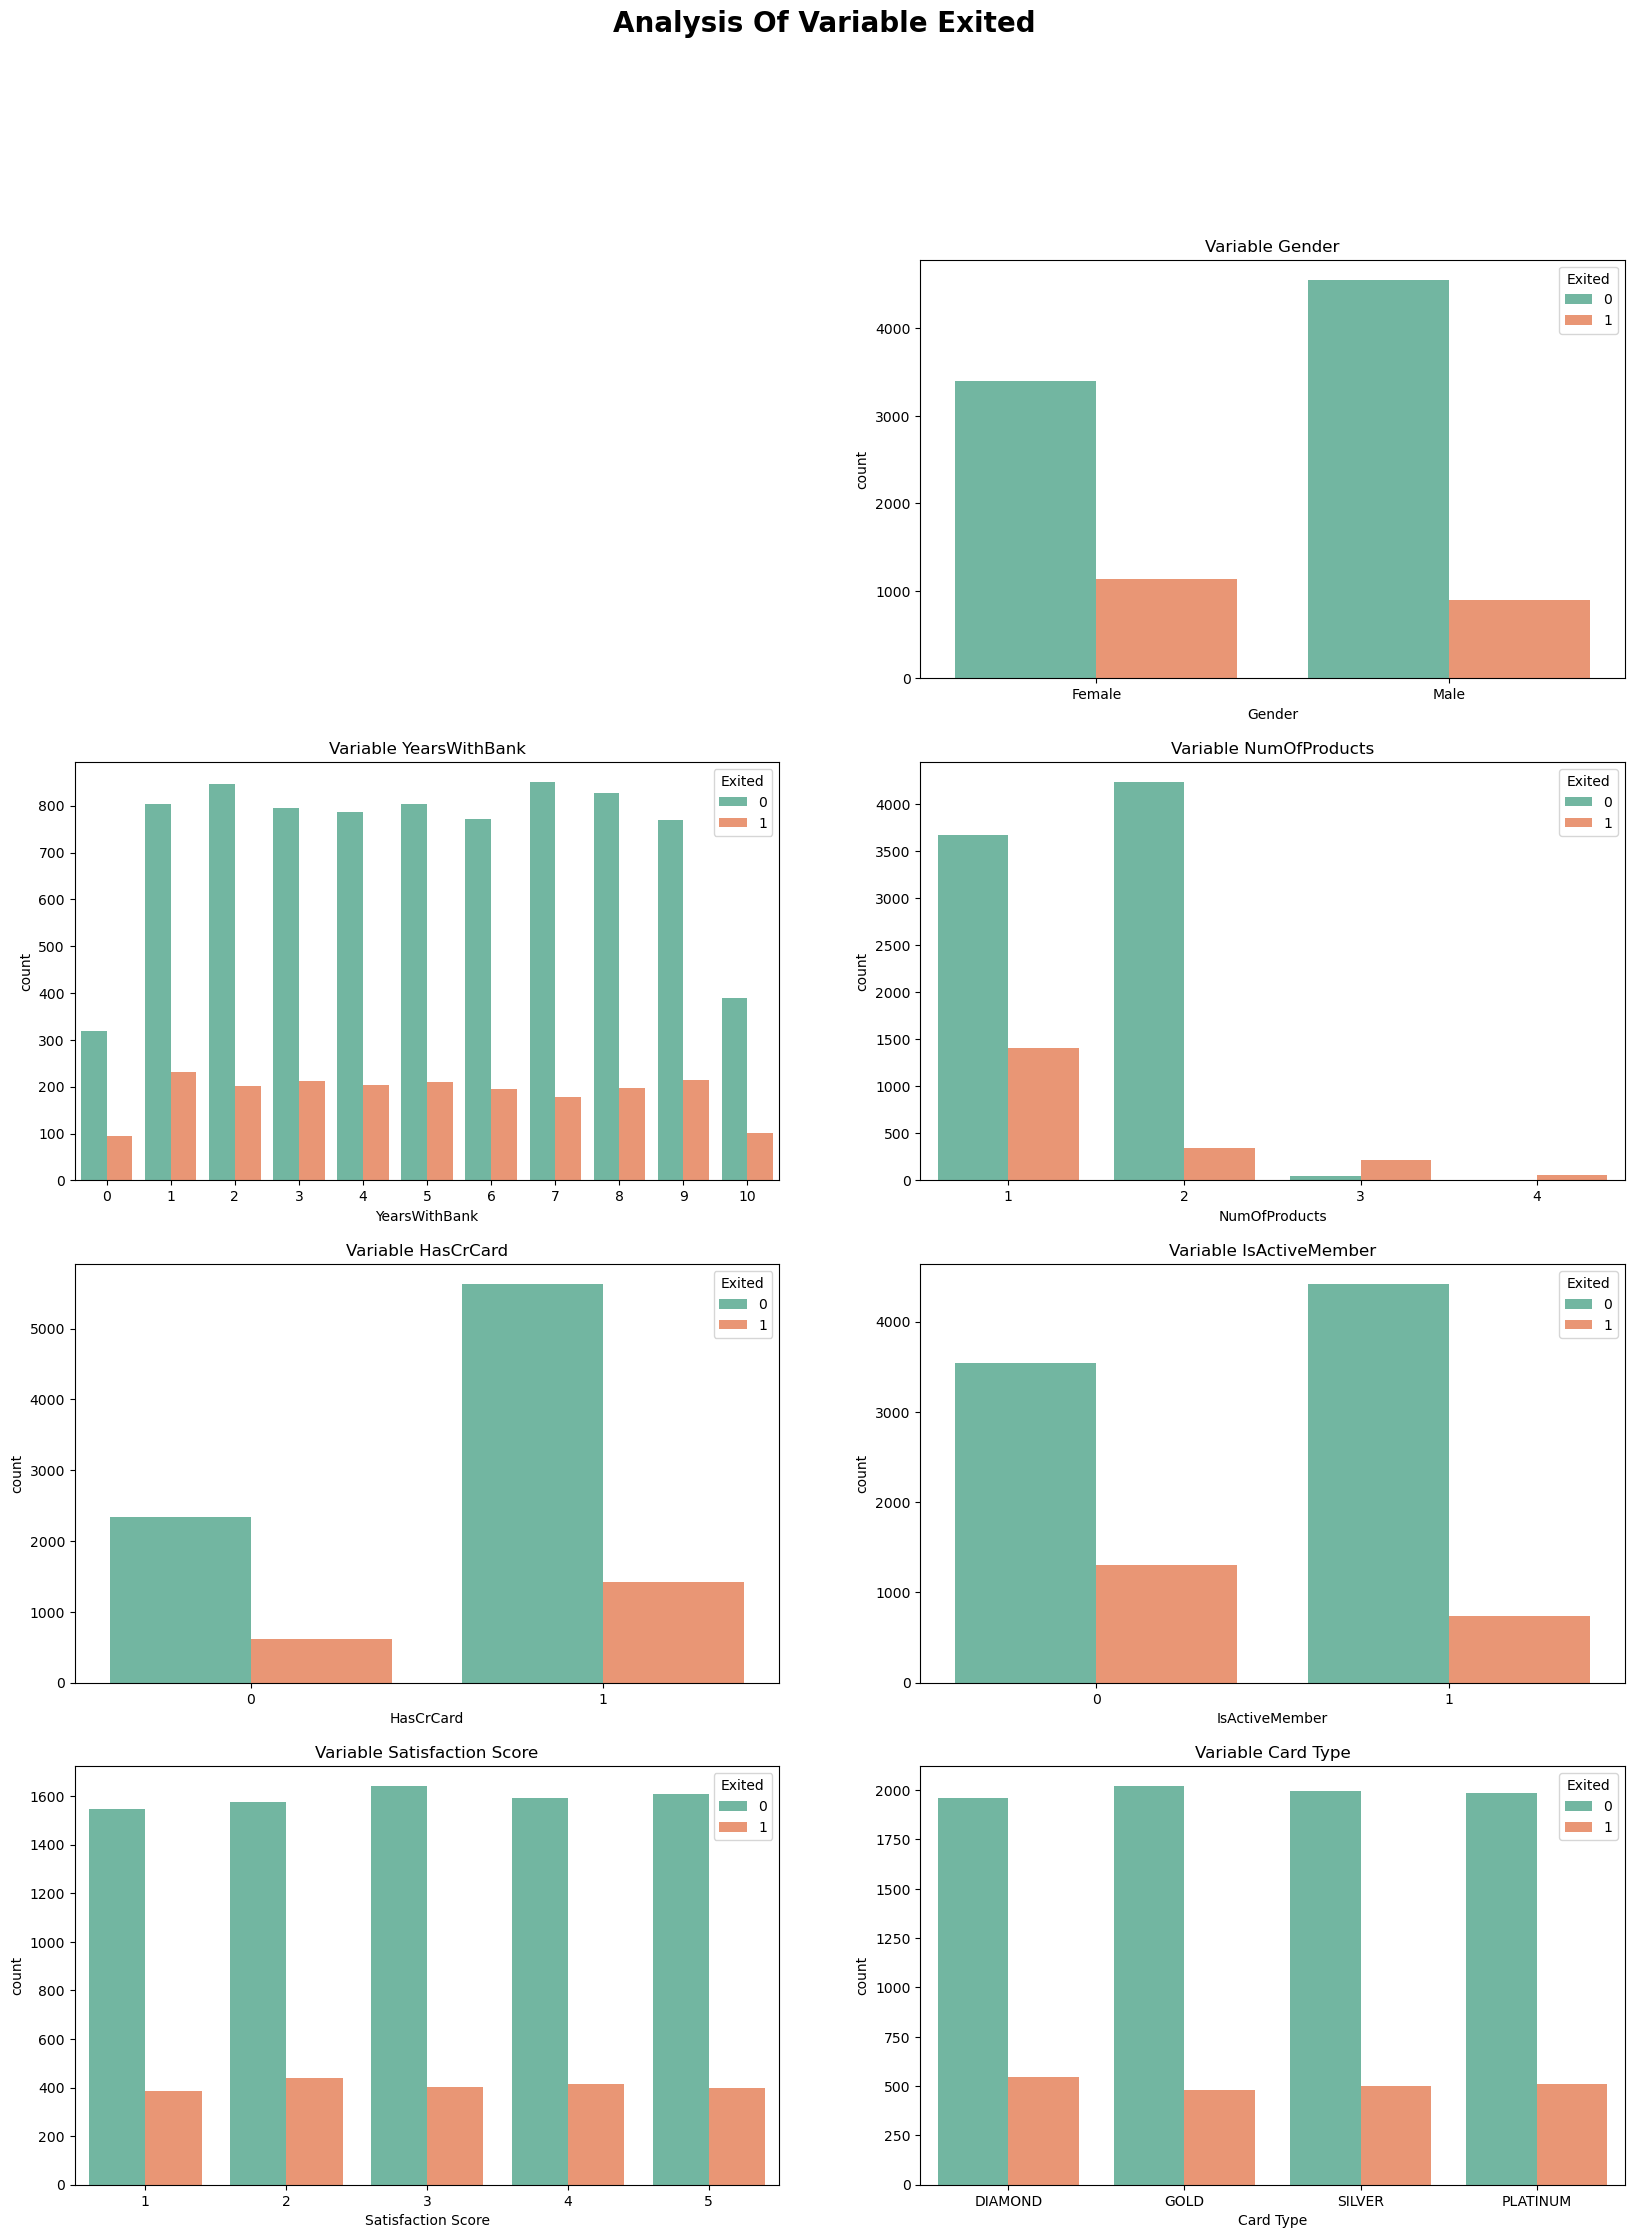

In [25]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Exited",fontweight="bold", fontsize=20)

# plt.subplot(4, 2, 1)
# plt.gca().set_title('Variable Geography')
# sns.countplot(x = 'Geography', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 2)
plt.gca().set_title('Variable Gender')
sns.countplot(x = 'Gender', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 3)
plt.gca().set_title('Variable YearsWithBank')
sns.countplot(x = 'YearsWithBank', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 4)
plt.gca().set_title('Variable NumOfProducts')
sns.countplot(x = 'NumOfProducts', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 5)
plt.gca().set_title('Variable HasCrCard')
sns.countplot(x = 'HasCrCard', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 6)
plt.gca().set_title('Variable IsActiveMember')
sns.countplot(x = 'IsActiveMember', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 7)
plt.gca().set_title('Variable Satisfaction Score')
sns.countplot(x = 'Satisfaction Score', hue = 'Exited', palette = 'Set2', data = df1)

plt.subplot(4, 2, 8)
plt.gca().set_title('Variable Card Type')
sns.countplot(x = 'Card Type', hue = 'Exited', palette = 'Set2', data = df1)

# Bivariate Analysis with Exitted: Comparing continious variables

In [26]:
# Age and Join Age, noticeable difference with Exitted target variable, impacts it more positively.

<Axes: title={'center': 'Variable Point Earned'}, xlabel='Exited', ylabel='Point Earned'>

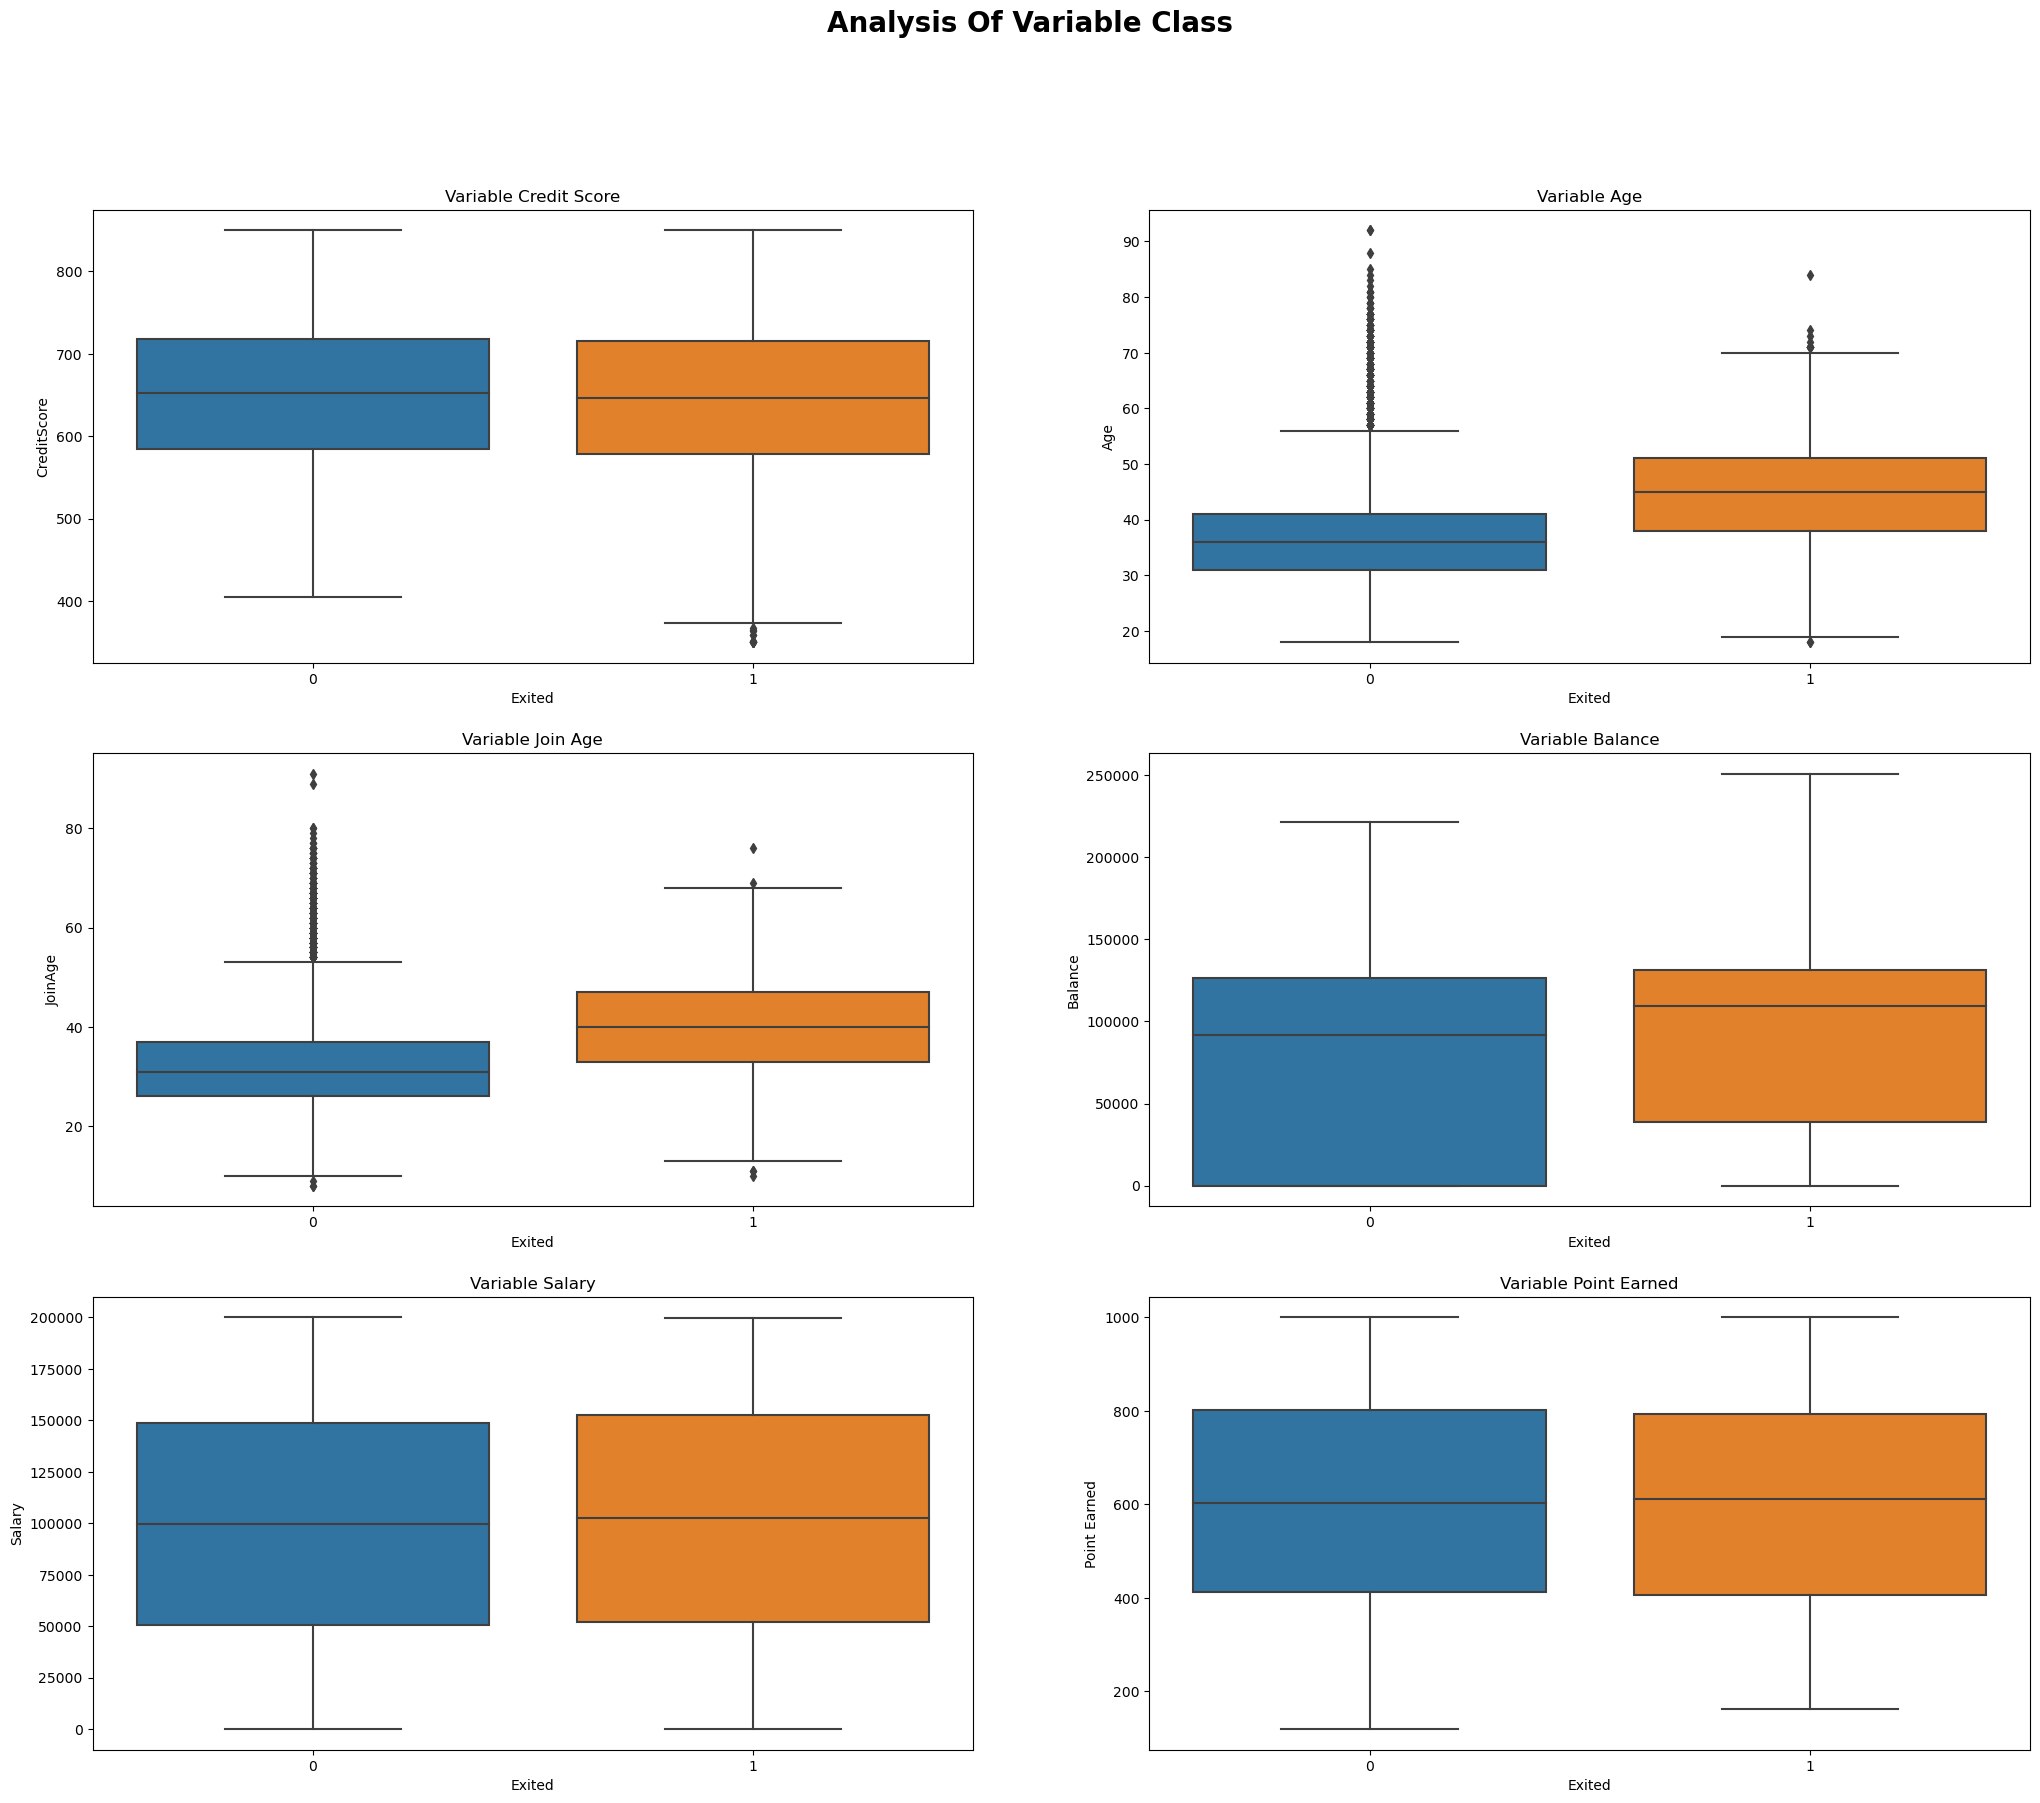

In [27]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Class",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
plt.gca().set_title('Variable Credit Score')
sns.boxplot(x="Exited", y="CreditScore", data=df1)

plt.subplot(3,2,2)
plt.gca().set_title('Variable Age')
sns.boxplot(x="Exited", y="Age", data=df1)

plt.subplot(3,2,3)
plt.gca().set_title('Variable Join Age')
sns.boxplot(x="Exited", y="JoinAge", data=df1)

plt.subplot(3,2,4)
plt.gca().set_title('Variable Balance')
sns.boxplot(x="Exited", y="Balance", data=df1)

plt.subplot(3,2,5)
plt.gca().set_title('Variable Salary')
sns.boxplot(x="Exited", y="Salary", data=df1)

plt.subplot(3,2,6)
plt.gca().set_title('Variable Point Earned')
sns.boxplot(x="Exited", y="Point Earned", data=df1)

# Modelling the Data

In [28]:
# OneHot Label Encoder
# categorical_variables = ['Geography', 'Gender', 'Card Type']
# categorical_variables = ['Gender', 'Card Type']
hot = pd.get_dummies(df[['Gender', 'Card Type']])

df1 = pd.concat([df1, hot], axis = 1)
df1 = df1.drop(['Gender', 'Card Type'], axis = 1)

#### Separating data into features and target variables

In [29]:
X = df1.drop('Exited', axis = 1)
X = X.values
y = df1['Exited']

#### Standard Scaler used to convert all data into their respective z scores so they are in the same scale

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Splitting transformed data into train and test

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

#### Balancing Classes: 
#### We have many values of a class and few values of others, will balance classes using oversampling

In [32]:
df1['Exited'].value_counts()

0    7962
1    2038
Name: Exited, dtype: int64

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

### Decision Tree Model

In [34]:
parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = DecisionTreeClassifier()
gridDecisionTree = RandomizedSearchCV(model, parameters, cv = 3, n_jobs = -1)
gridDecisionTree.fit(X_train, y_train)

print('Best Metrics to Use in Model')
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Best Metrics to Use in Model
Mín Split:  7
Max Nvl:  11
Algorithm:  entropy
Score:  0.8221706526407412


In [35]:
# decision_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = 2, max_depth= 11, random_state=0)
# decision_tree.fit(X_train, y_train)
# previsoes = decision_tree.predict(X_test)

# cm = confusion_matrix(decision_tree)
# cm.fit(X_train, y_train)
# cm.score(X_test, y_test)

# Initialize and train the decision tree model
decision_tree = DecisionTreeClassifier(criterion='gini', min_samples_split=2, max_depth=11, random_state=0)
decision_tree.fit(X_train, y_train)

# Obtain predictions on the test data
predictions = decision_tree.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1823  555]
 [ 219  403]]


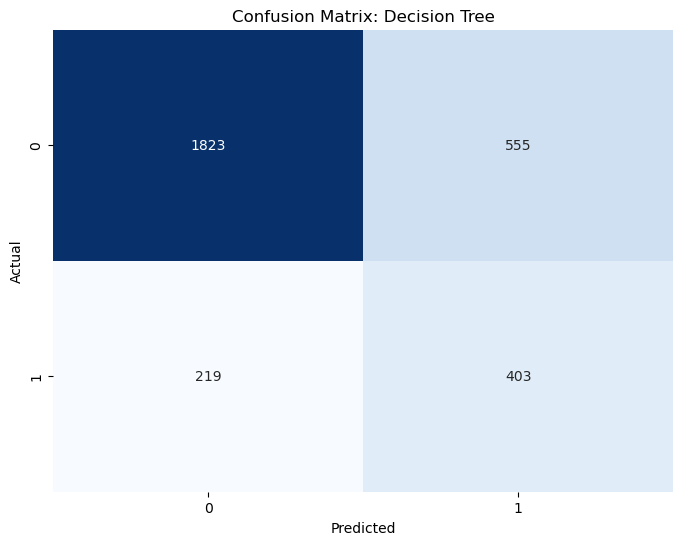

In [36]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Decision Tree')
plt.show()

In [37]:
classification_decision = (classification_report(y_test, predictions))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      2378
           1       0.42      0.65      0.51       622

    accuracy                           0.74      3000
   macro avg       0.66      0.71      0.67      3000
weighted avg       0.79      0.74      0.76      3000



### Feature importance ranking of the Decision Tree model

In [38]:
columns = df1.drop('Exited', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Age                   0.290277
NumOfProducts         0.183480
Balance               0.118343
Point Earned          0.083194
Salary                0.082591
CreditScore           0.067801
IsActiveMember        0.047944
JoinAge               0.033920
YearsWithBank         0.031068
Satisfaction Score    0.019675
Card Type_SILVER      0.011735
Gender_Male           0.009767
Card Type_PLATINUM    0.006786
HasCrCard             0.006150
Card Type_GOLD        0.003421
Gender_Female         0.002851
Card Type_DIAMOND     0.000997
dtype: float64

### Random Forest

#### Will use Entropy and Gini 

In [39]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth': [3, 4, 5, 6, 7, 9, 11],
              'min_samples_split': [2, 3, 4, 5, 6, 7],
              'criterion': ['entropy', 'gini']
             }

model = RandomForestClassifier()
gridRandomForest = RandomizedSearchCV(model, parameters, cv = 5, n_jobs = -1)
gridRandomForest.fit(X_train, y_train)
print('Best estimators for Random Forest')
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Best estimators for Random Forest
Algorithm:  entropy
Score:  0.8810893487088961
Mín Split:  5
Max Nvl:  11


In [40]:
# Initialize and train the random forest model
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)

# Obtain predictions on the test data
rf_predictions = random_forest.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2063  315]
 [ 216  406]]


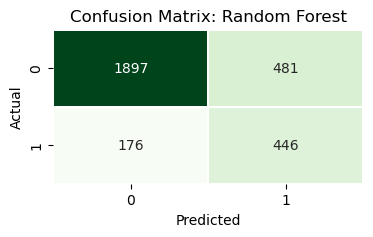

In [64]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, linewidths=0.1, )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Random Forest')
plt.show()

In [42]:
classification_random = (classification_report(y_test, rf_predictions))
print(classification_random)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      2378
           1       0.56      0.65      0.60       622

    accuracy                           0.82      3000
   macro avg       0.73      0.76      0.75      3000
weighted avg       0.83      0.82      0.83      3000



#### Ran the Random Forest Model again with max_depth=4 so we can visualize the trees

In [90]:
# Initialize and train the random forest model
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 4,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)

# Obtain predictions on the test data
rf_predictions = random_forest.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1897  481]
 [ 176  446]]


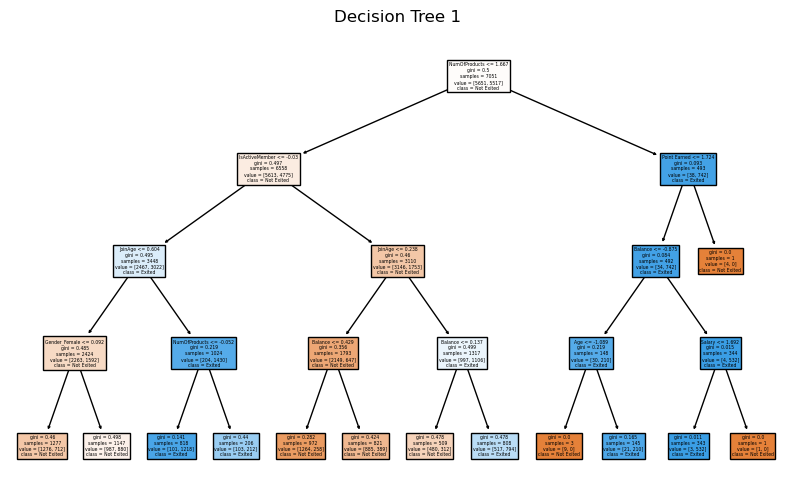

In [91]:
from sklearn.tree import plot_tree
# from dtreeviz import dtreeviz
# Convert X_train to a pandas DataFrame
X_train_columns = ['CreditScore', 'Age', 'YearsWithBank', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'Salary', 'Satisfaction Score',
       'Point Earned', 'JoinAge', 'Gender_Female', 'Gender_Male',
       'Card Type_DIAMOND', 'Card Type_GOLD', 'Card Type_PLATINUM',
       'Card Type_SILVER']

# Get all the decision trees from the random forest
estimators = random_forest.estimators_

# Get the first decision tree from the list of estimators
first_tree = estimators[0]

# estimators[0].tree_.max_depth


# Plot the first decision tree
plt.figure(figsize=(10, 6))
plot_tree(first_tree, filled=True, feature_names=X_train_columns, class_names=['Not Exited', 'Exited'])
plt.title('Decision Tree 1')

# Save the plot as an image
plt.savefig('Random Forest: First Tree.png', dpi=300)

# Show the plot
plt.show()


### Feature importance ranking of the Random Forest model

In [46]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Age                   0.293784
NumOfProducts         0.272259
JoinAge               0.245933
Balance               0.065449
IsActiveMember        0.060519
Gender_Male           0.020973
Gender_Female         0.016725
CreditScore           0.009097
Salary                0.005837
Point Earned          0.004527
YearsWithBank         0.002377
Satisfaction Score    0.001164
HasCrCard             0.000493
Card Type_GOLD        0.000463
Card Type_SILVER      0.000197
Card Type_PLATINUM    0.000110
Card Type_DIAMOND     0.000093
dtype: float64

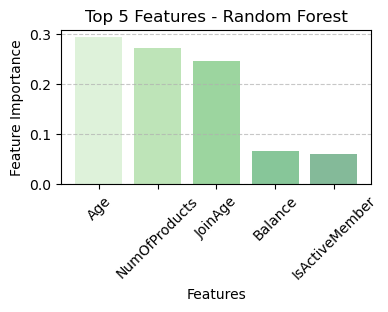

In [85]:
# Get the top 5 features
top_features = feature_imp_random.head(5)

# Define the number of features
n_features = len(top_features)

# Create a fading green color palette
colors = sns.color_palette("Greens", n_features)

# Define custom alpha values (reversed)
alphas = [0.5 + (n_features - i - 1) * 0.5 / n_features for i in range(n_features)]

# Plotting the top 5 features with fading green colors
plt.figure(figsize=(4, 2))
for i, (feature, importance) in enumerate(top_features.items()):
    plt.bar(feature, importance, color=colors[i], alpha=alphas[i])

plt.title('Top 5 Features - Random Forest')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### AdaBoost Model

In [47]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {'learning_rate': [0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005],
              'n_estimators': [300, 500]
             }

model = AdaBoostClassifier()
gridAdaBoost = RandomizedSearchCV(model, parameters, cv = 2, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  0.5
Score:  0.7666547277936963


In [86]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 0.5, random_state = 0)
ada_boost.fit(X_train, y_train)
ada_predictions = ada_boost.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, ada_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1845  533]
 [ 145  477]]


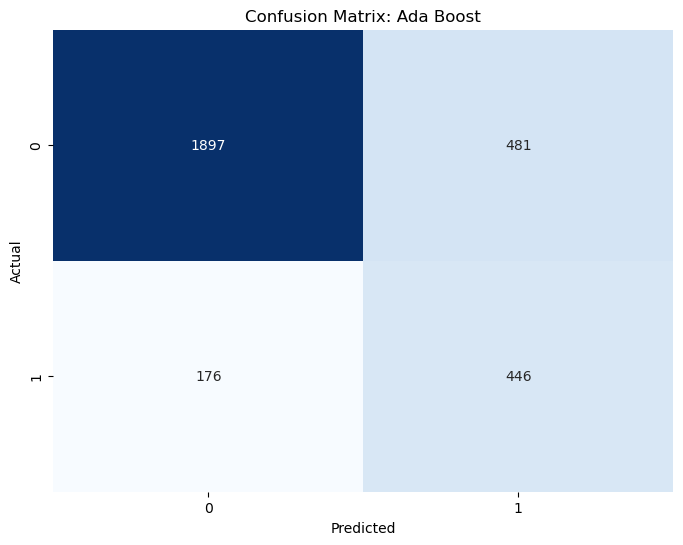

In [92]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Ada Boost')
plt.show()

In [94]:
classification_ada_scaler = (classification_report(y_test, ada_predictions))
print(classification_ada_scaler)

              precision    recall  f1-score   support

           0       0.93      0.78      0.84      2378
           1       0.47      0.77      0.58       622

    accuracy                           0.77      3000
   macro avg       0.70      0.77      0.71      3000
weighted avg       0.83      0.77      0.79      3000

